In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import json
from pandas.io.json import json_normalize

%matplotlib inline

init_notebook_mode(connected=True)

In [2]:
def str_to_list(x):
    return eval(x) if x and x != '#N/A' else []

list_cols = [
    'genres',
    'belongs_to_collection',
    'production_companies',
    'production_countries',
    'spoken_languages',
    'Keywords',
    'cast',
    'crew'
]

io_params = {
    'index_col': 'id',
    'converters': {col: str_to_list for col in list_cols}
}

# We can read the train and the test in one go using the concat function
# data = pd.read_csv('../data/train.csv', **io_params)
data = pd.concat(
    objs=(
        pd.read_csv('../data/train.csv', **io_params).assign(is_train=True),
        pd.read_csv('../data/test.csv', **io_params).assign(is_train=False)
    ),
    sort=False
)

In [3]:
# data.head(100)
data

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,is_train
id,,,,,,,,,,,,,,,,,,,,,
1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651.0,True
2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435.0,True
3,[],3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000.0,True
4,[],1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000.0,True
5,[],0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,[],"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970.0,True
6,[],8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,/6IDqA1D2NBIVhzEEaMMRL28iBrq.jpg,...,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Pinocchio and the Emperor of the Night,[],"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638.0,True
7,[],14000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.thepossessionmovie.com/,tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,/4QjzFuaZmB4btGnLwAgdp23BzIU.jpg,...,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fear The Demon That Doesn't Fear God,The Possession,[],"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075.0,True
8,[],0,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0391024,en,Control Room,A chronicle which provides a rare window into ...,1.949044,/83BV8fGy5p9i8RwE9oj76tZ1Ikp.jpg,...,84.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,Different channels. Different truths.,Control Room,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c75

In [208]:
## Get rid of the columns that are not relevant:

# drop_col_names = ['belongs_to_collection', 'budget', 'genres', 'original_language', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'runtime', 'spoken_languages', 'cast', 'crew', 'revenue']
# clean = data[drop_col_names]


In [8]:
# https://ipython-books.github.io/71-exploring-a-dataset-with-pandas-and-matplotlib/

## EDA
data.dtypes
train_eda_data = data[data['is_train'] == True]
train_eda_data.tail()
# belongs_to_collection:

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,is_train
id,,,,,,,,,,,,,,,,,,,,,
2996,[],0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,/j8Q7pQ27hvH54wpxJzIuQgQCdro.jpg,...,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687.0,True
2997,[],0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,tt2364975,sv,Vi är bäst!,Three girls in 1980s Stockholm decide to form ...,3.727996,/sS01LSy6KDrCZAhtkO18UdnWFT1.jpg,...,102.0,"[{'iso_639_1': 'sv', 'name': 'svenska'}]",Released,NaN,We Are the Best!,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590.0,True
2998,[],65000000,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",NaN,tt0116908,en,The Long Kiss Goodnight,"Samantha Caine, suburban homemaker, is the ide...",14.482345,/4MENR8x6mYqnZvp2hGjSaPJz64J.jpg,...,120.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What's forgotten is not always gone.,The Long Kiss Goodnight,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761.0,True
2999,[],42000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",http://www.alongcamepolly.com/,tt0343135,en,Along Came Polly,Reuben Feffer is a guy who's spent his entire ...,15.725542,/nIY4kvJTTnxoBR0wycrXng5MOYs.jpg,...,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"For the most cautious man on Earth, life is ab...",Along Came Polly,"[{'id': 966, 'name': 'beach'}, {'id': 2676, 'n...","[{'cast_id': 8, 'character': 'Reuben Feffer', ...","[{'credit_id': '556f817b9251410866000a63', 'de...",171963386.0,True
3000,[],35000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",http://www.abductionthefilm.com/,tt1600195,en,Abduction,A young man sets out to uncover the truth abou...,10.512109,/cUT6NQP5LAJpmUoStGtXmvNt4zA.jpg,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They stole his life. He's taking it back.,Abduction,"[{'id': 591, 'name': 'cia'}, {'id': 822, 'name...","[{'cast_id': 2, 'character': 'Nathan Harper', ...","[{'credit_id': '5391990d0e0a260fb5001629', 'de...",82087155.0,True


In [9]:
## budget:
budget_plot_data = [go.Scatter(x=train_eda_data['budget'], y=train_eda_data['revenue'], mode='markers')]
layout = go.Layout(
    xaxis=dict(
        range=[0, 1e8]
    ),
    yaxis=dict(
        range=[0, 1e9]
    )
)
iplot(go.Figure(data = budget_plot_data))

dict_keys(['Comedy', 'Drama', 'Family', 'Romance', 'Thriller', 'Action', 'Animation', 'Adventure', 'Horror', 'Documentary', 'Music', 'Crime', 'Science Fiction', 'Mystery', 'Foreign', 'Fantasy', 'War', 'Western', 'History', 'TV Movie'])
Comedy
Drama
Family
Romance
Thriller
Action
Animation
Adventure
Horror
Documentary
Music
Crime
Science Fiction
Mystery
Foreign
Fantasy
War
Western
History
TV Movie
Comedy
Drama
Family
Romance
Thriller
Action
Animation
Adventure
Horror
Documentary
Music
Crime
Science Fiction
Mystery
Foreign
Fantasy
War
Western
History
TV Movie


Text(0, 0.5, 'Average Revenues')

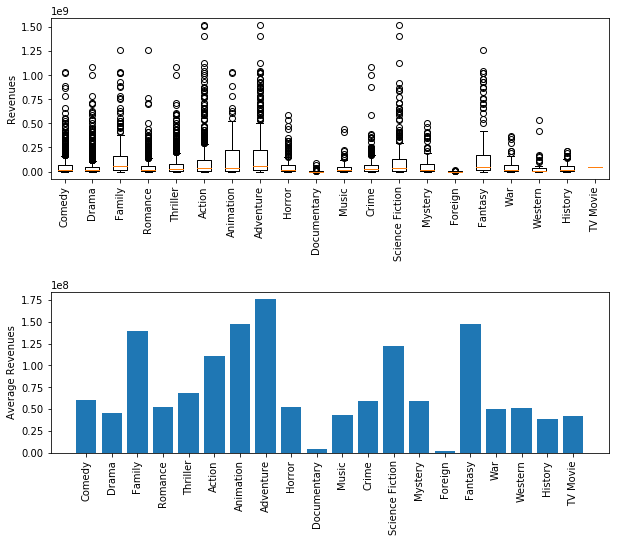

In [147]:
## genres: one hot encoding

def check_values(column, key, value):
    """
    input: 
    output: a vector of True/False
    """
    results = []
    for list_of_dict in column:
        value_found = False
        for item in list_of_dict:
            if item[key] == value:
                value_found = True
        results.append(value_found)
    return results
    
def get_freqs(series, attribute):
    freq_dict = {}
    for values_list in series:
        for values_dict in values_list:
            if values_dict[attribute] not in freq_dict:
                freq_dict[values_dict[attribute]] = 1
            else:
                freq_dict[values_dict[attribute]] += 1
    return freq_dict

genre_freq = get_freqs(data['genres'], 'name')
unique_genres = genre_freq.keys()

print(unique_genres)

## One-Hot Encoding:
for genre_name in unique_genres:
    data[genre_name] = np.where(check_values(data['genres'], 'name', genre_name), 1, 0)

data_to_plot = []
for genre_name in unique_genres:
    print(genre_name)
    data_to_plot.append(data[data[genre_name] == 1 & data['is_train']]['revenue'].dropna().values)

fig = plt.figure(1, figsize=(10, 8))
fig.subplots_adjust(hspace=0.7, wspace=0.4)

# Create an axes instance
ax = fig.add_subplot(211)

# Create the boxplot
ax.boxplot(data_to_plot)
ax.set_xticklabels(unique_genres)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Revenues')

    
averages = []
for genre_name in unique_genres:
    print(genre_name)
    averages.append(data[data[genre_name] == 1 & data['is_train']]['revenue'].dropna().values.mean())

genre_barplot = fig.add_subplot(212)
genre_barplot.bar(unique_genres, averages)
genre_barplot.tick_params(axis='x', labelrotation=90)
genre_barplot.set_ylabel('Average Revenues')


In [54]:
# Languages: one-hot encoding
language_freq = get_freqs(data['spoken_languages'], 'iso_639_1')
# sorted(language_freq.items(), key=operator.itemgetter(1))
unique_languages = language_freq.keys()
print(unique_languages)

## One-Hot Encoding:
for language in unique_languages:
    data[language] = np.where(check_values(data['spoken_languages'], 'name', language), 1, 0)

dict_keys(['en', 'hi', 'ko', 'ar', 'ru', 'sv', 'sr', 'de', 'fr', 'it', 'ja', 'he', 'pt', 'la', 'zh', 'es', 'nl', 'cn', 'qu', 'cs', 'ta', 'te', 'pl', 'tr', 'gd', 'hu', 'el', 'ga', 'fa', 'th', 'ca', 'tl', 'da', 'bn', 'kk', 'sh', 'yi', 'af', 'hy', 'pa', 'bg', 'sw', 'no', 'mr', 'bo', 'xx', 'fi', 'ur', 'sq', 'ro', 'ln', 'my', 'id', 'vi', 'am', 'sk', 'uk', 'eo', 'eu', 'sa', 'ny', 'st', 'xh', 'zu', 'mi', 'ml', 'so', 'lo', 'is', 'wo', 'et', 'ps', 'si', 'hr', 'kw', 'nv', 'gu', 'ku', 'km', 'ka', 'iu', 'bs', 'jv', 'bm', 'to', 'mn', 'ne', 'ce', 'as', 'gl', 'cy', 'kn', 'ms', 'mk', 'ty', 'gn', 'br', 'mt'])


(array([595., 497., 425., 362., 388., 560., 617., 623., 560., 507., 448.,
        431., 320., 231., 215., 118.,  93.,  63.,  57.,  50.,  28.,  20.,
         14.,  18.,  13.,  10.,  11.,   7.,   6.,  10.,   6.,  10.,   3.,
          7.,   7.,   3.,  10.,   2.,   2.,   3.,   1.,   6.,   3.,   1.,
          1.,   1.,   0.,   1.,   2.,   1.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]),
 <a list of 50 Patch objects>)

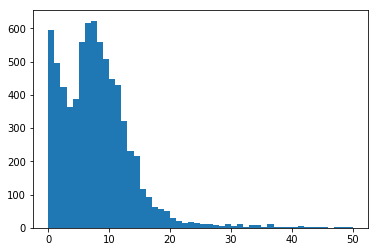

In [73]:
# Popularity
# plt.scatter(x=data[data['is_train']]['popularity'], y = data[data['is_train']]['revenue'])
plt.hist(x=data[data['is_train'] & data['popularity'] < 50]['popularity'], bins=50, range=[0, 50])


In [74]:
data.dtypes

belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
Keywords                  object
cast                      object
crew                      object
revenue                  float64
is_train                    bool
Comedy                     int64
Drama                      int64
Family                     int64
Romance                    int64
Thriller                   int64
Action                     int64
Animation                  int64
          

In [115]:
type(data[(data['Comedy'] == 1) & (data['is_train'])]['revenue'].values)

numpy.ndarray